In [92]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [108]:
data= pd.read_csv("HR_comma_sep.csv")

In [109]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [110]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [111]:
dumv=pd.get_dummies(data.salary)
data=pd.concat([data,dumv],axis=1)


In [112]:
y=data["left"]

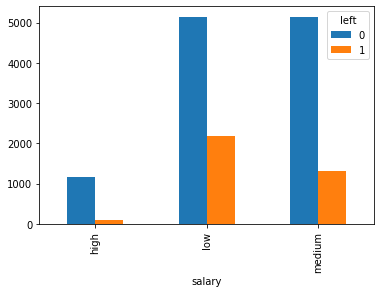

In [113]:
import matplotlib.pyplot as plt

ct=pd.crosstab(data.salary,data.left).plot(kind='bar')


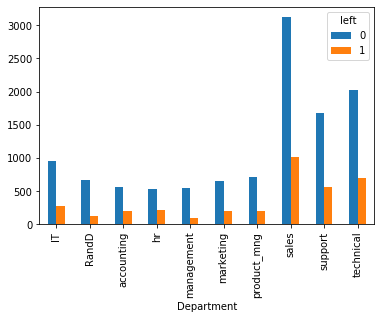

In [114]:
ct=pd.crosstab(data.Department,data.left).plot(kind='bar')


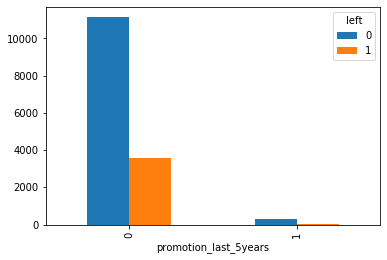

In [115]:
ct=pd.crosstab(data.promotion_last_5years, data.left).plot(kind='bar')



In [117]:
data=data.drop(["salary", "time_spend_company", "Department", "Work_accident","last_evaluation","left"], axis=1)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(data,y, test_size=0.2)

In [119]:
model= LogisticRegression()


In [120]:
model.fit(x_train, y_train)

/Users/khaledkarokhi/Documents/aconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
ypre= model.predict(x_train)
ypred =model.predict(x_test)

In [128]:
data['predict'] = np.concatenate((ypre,ypred),axis=0)

In [129]:
data['left']=y

In [130]:
data

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,high,low,medium,predict,y,left
0,0.38,2,157,0,0,1,0,0,1,1
1,0.80,5,262,0,0,0,1,0,1,1
2,0.11,7,272,0,0,0,1,1,1,1
3,0.72,5,223,0,0,1,0,0,1,1
4,0.37,2,159,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,2,151,0,0,1,0,1,1,1
14995,0.37,2,160,0,0,1,0,0,1,1
14996,0.37,2,143,0,0,1,0,0,1,1
14997,0.11,6,280,0,0,1,0,0,1,1


In [131]:
model.score(x_train,ypre)

1.0